# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [134]:
# X = np.array([[1,2],[3,4],[5,6],[7,8]])
# print('X', X)
# y = np.array([1,0,1,0])
# print('y', y)

# np.argwhere(y==1)

# admitted = X[np.argwhere(y==1)]
# print('admitted', admitted)

# for s in admitted:
#     print('s', s)

## Reading and plotting the data

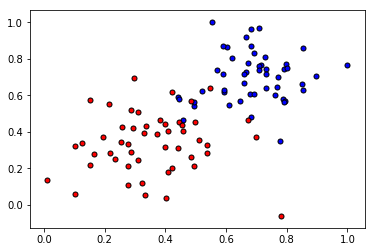

In [135]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [136]:
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [80]:
np.exp(np.array(1))

2.7182818284590451

In [131]:
# # np.matmul([1,2], [3,4])
# # np.matmul(np.array([[1,2]]), np.array([[3],[4]]))

# # X = np.array([[1,2], [3, 4], [5, 6]])
# # W = np.array([[3],[4]])

# X = np.array([[1,2], [3, 4], [5, 6]])
# W = np.array([3,4])

# print('X', X)
# print('W', W)
# print('matmul', np.matmul(X, W))

# np.exp([1,2,3])


# y = np.array([0, 1, 1])
# output = np.array([0.1, 0.2, 0.3])

# - y * np.log(output) - (1 - y) * np.log(1 - output)

np.array([0, 1, 1]) * np.array([0, 1, 2])


np.matmul(np.array([[1,2], [3, 4]]), np.array([5,6]))

array([17, 39])

In [82]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y * np.log(output) - (1 - y) * np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_hat = output_formula(x, weights, bias)
    weights += learnrate * (y - y_hat) * x
    bias += learnrate * (y - y_hat)
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

### Original Solution 1: update w and b with each sample

In [83]:
np.random.seed(44)

epochs = 100
learnrate = 0.01
### Original Solution 1:

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()s, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.713584519538
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.622583521045
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.554874408367
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.459333464186
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.425255434335
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.397346157167
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.374146976524
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.354599733682
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.337927365888
Accuracy:  0.94


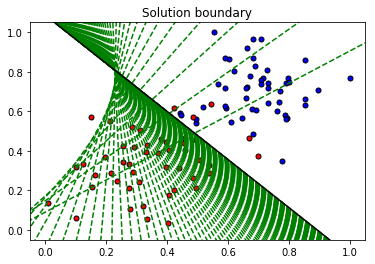

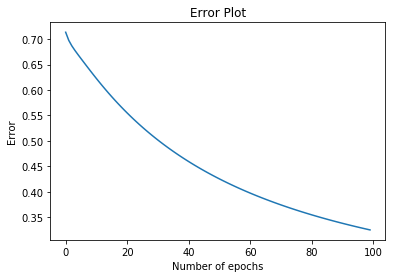

In [84]:
train(X, y, epochs, learnrate, True)

### Solution 2: update w and b with all samples

In [137]:
# Gradient descent step
def update_weights_2(x, y, weights, bias, learnrate):
    y_hat = output_formula(x, weights, bias)
    weights += learnrate * np.mean(np.reshape(y - y_hat, (-1, 1)) * x, axis=0)
    bias += learnrate * np.mean(y - y_hat)
    return weights, bias

In [142]:
np.random.seed(44)

# epochs = 100
# learnrate = 0.01

epochs = 100
learnrate = 1


def train_2(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
#         for x, y in zip(features, targets):
#             output = output_formula(x, weights, bias)
#             error = error_formula(y, output)
#             weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        output = output_formula(features, weights, bias)
        error = error_formula(targets, output)
        weights, bias = update_weights_2(features, targets, weights, bias, learnrate)        
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.71523409085
Accuracy:  0.42

========== Epoch 10 ==========
Train loss:  0.618312978899
Accuracy:  0.72

========== Epoch 20 ==========
Train loss:  0.550891067082
Accuracy:  0.85

========== Epoch 30 ==========
Train loss:  0.498227979596
Accuracy:  0.9

========== Epoch 40 ==========
Train loss:  0.456483489717
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.42284856143
Accuracy:  0.94

========== Epoch 60 ==========
Train loss:  0.39530652786
Accuracy:  0.94

========== Epoch 70 ==========
Train loss:  0.372410725448
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.353114484332
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.336650646205
Accuracy:  0.94


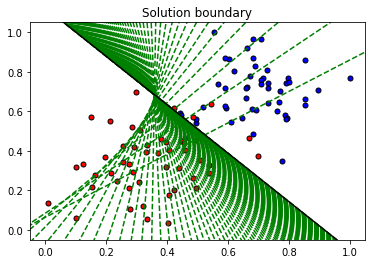

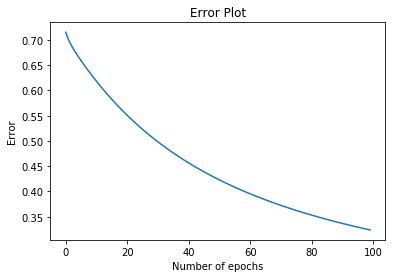

In [143]:
train_2(X, y, epochs, learnrate, True)

In [111]:
yy = np.array([1, 0, 1])

print('reshape', np.reshape(yy, (-1, 1)))

yy_hat = np.array([0.8, 0.2, 0.7])
print('yy-yy_hat', yy - yy_hat)

xx = np.array([[1,2], [3,4], [5, 6]])
print('xx', xx)

print('del', np.reshape(yy - yy_hat, (-1, 1)) * xx)
print('del_mean', np.mean(np.reshape(yy - yy_hat, (-1, 1)) * xx, axis=0))
print('del_mean', np.mean(np.reshape(yy - yy_hat, (-1, 1)) * xx, axis=0))

ww = np.array([0.0, 0.0])


ww += np.mean(np.reshape(yy - yy_hat, (-1, 1)) * xx, axis=0)

reshape [[1]
 [0]
 [1]]
yy-yy_hat [ 0.2 -0.2  0.3]
xx [[1 2]
 [3 4]
 [5 6]]
del [[ 0.2  0.4]
 [-0.6 -0.8]
 [ 1.5  1.8]]
del_mean [ 0.36666667  0.46666667]
del_mean [ 0.36666667  0.46666667]
